# Credit Card Fraud Detection
by **Sai Vamsy Dhulipala**

## Part V - Model Evaluation

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 400)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

In [3]:
from os import chdir, getcwd
import pickle

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## Importing the data

### Defining a function to read the data

In [5]:
def read_data(name):
    file = pickle.load(open(getcwd() + "/data/" + name + ".pkl","rb"))
    return file

### Reading the data

In [6]:
folder_path = input("Please provide the path of the folder, by replacing \\ as /:")
chdir(folder_path)

In [7]:
log_reg = read_data("models/log_reg")
cols_log_reg = read_data("models/cols_log_reg")

In [8]:
svc = read_data("models/svc")
cols_svc = read_data("models/cols_svc")

In [9]:
X_train_decomposed = read_data("decomposed_data/X_train_decomposed")
X_valid_decomposed = read_data("decomposed_data/X_valid_decomposed")
X_test_decomposed = read_data("decomposed_data/X_test_decomposed")

y_train = read_data("decomposed_data/y_train")
y_valid = read_data("decomposed_data/y_valid")
y_test = read_data("decomposed_data/y_test")

## Model evaluation

### Defining functions useful for model evaluation

In [10]:
def get_confusion_matrix(truth, pred):
    confusion = confusion_matrix(truth, pred)
    
    cm = pd.DataFrame(index=["0","1"],data={"0":confusion[:,0],"1":confusion[:,1]})
    cm.columns = pd.MultiIndex.from_product([["Predicted"],["0","1"]])
    cm.set_index(pd.MultiIndex.from_product([["Actual"],["0","1"]]),inplace=True)
    
    print(cm)

In [11]:
def get_model_results(model, cols):
    y_train_pred = model.predict(X_train_decomposed[:,cols])
    y_valid_pred = model.predict(X_valid_decomposed[:,cols])
    y_test_pred = model.predict(X_test_decomposed[:,cols])

    print("result on train set:")
    print(classification_report(y_train, y_train_pred), end="\n\n")
    print("confusion matrix of train set:")
    get_confusion_matrix(y_train, y_train_pred)
    print("\n\n")

    print("result on valid set:")
    print(classification_report(y_valid, y_valid_pred), end="\n\n")
    print("confusion matrix of valid set:")
    get_confusion_matrix(y_valid, y_valid_pred)
    print("\n\n")

    print("result on test set:")
    print(classification_report(y_test, y_test_pred), end="\n\n")
    print("confusion matrix of test set:")
    get_confusion_matrix(y_test, y_test_pred)

In [12]:
# To be tested
def plot_roc_curve(pred_probs):

    truth = [y_train, y_valid, y_test]
    
    titles = ["ROC Curve on " + x for x in ["train", "valid", "test"]]

    fig, axs = plt.subplots(1, 3, figsize=(25,8))

    for i, ax in enumerate(axs):

        fpr, tpr, thresholds = roc_curve(truth[i], pred_probs[i], drop_intermediate=False)

        auc_score = roc_auc_score(truth[i], pred_probs[i])

        ax.plot(fpr, tpr, label='ROC Curve (Area = %0.3f)'%auc_score)
        ax.plot([0, 1], [0, 1], 'k--')

        ax.set_xlabel("False Positive Rate or [1 - True Negative Rate]")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(titles[i])
        
        ax.legend(loc=0)

    fig.show()

### 1. Evaluating Logistic Regression

In [13]:
get_model_results(log_reg, cols_log_reg)

result on train set:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    902418
           1       0.07      0.87      0.12      5254

    accuracy                           0.93    907672
   macro avg       0.53      0.90      0.54    907672
weighted avg       0.99      0.93      0.96    907672


confusion matrix of train set:
         Predicted       
                 0      1
Actual 0    837302  65116
       1       669   4585



result on valid set:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    386751
           1       0.07      0.88      0.12      2252

    accuracy                           0.93    389003
   macro avg       0.53      0.90      0.54    389003
weighted avg       0.99      0.93      0.96    389003


confusion matrix of valid set:
         Predicted       
                 0      1
Actual 0    358830  27921
       1       281   1971



result on test set:
      

<ipython-input-12-7ceebab4b928>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


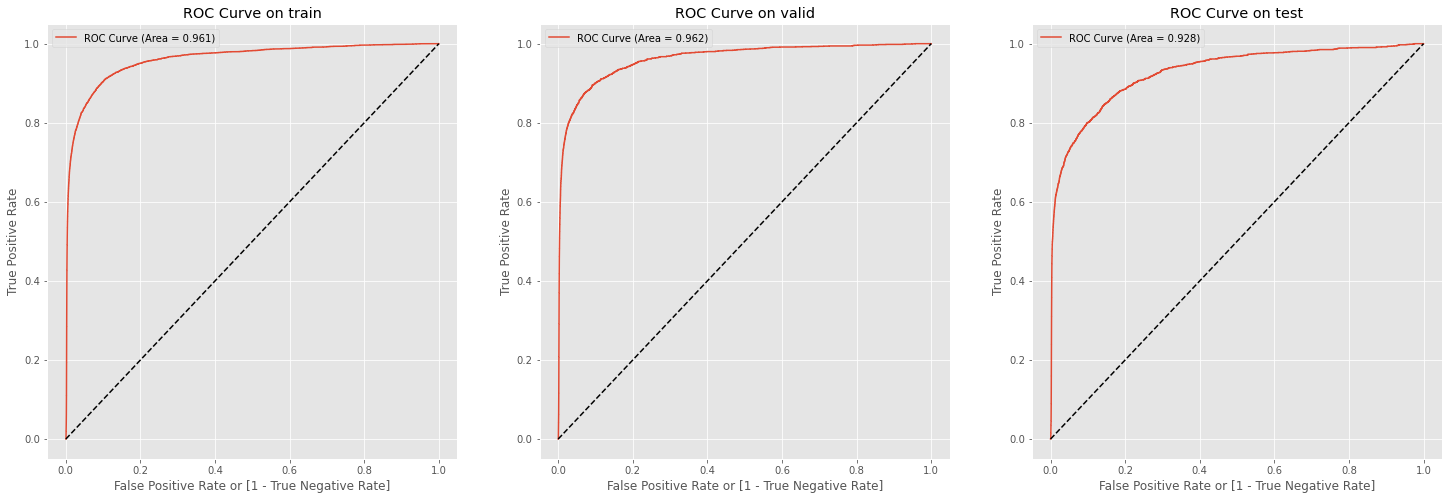

In [14]:
pred_probs_log_reg = [log_reg.predict_proba(X[:,cols_log_reg])[:,1] for X in (X_train_decomposed, X_valid_decomposed, X_test_decomposed)]

plot_roc_curve(pred_probs_log_reg)

### 2. Evaluating Linear SVC

In [15]:
get_model_results(svc, cols_svc)

result on train set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    902418
           1       0.05      0.86      0.09      5254

    accuracy                           0.90    907672
   macro avg       0.52      0.88      0.52    907672
weighted avg       0.99      0.90      0.94    907672


confusion matrix of train set:
         Predicted       
                 0      1
Actual 0    809202  93216
       1       748   4506



result on valid set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94    386751
           1       0.05      0.87      0.09      2252

    accuracy                           0.90    389003
   macro avg       0.52      0.88      0.52    389003
weighted avg       0.99      0.90      0.94    389003


confusion matrix of valid set:
         Predicted       
                 0      1
Actual 0    346695  40056
       1       303   1949



result on test set:
      

<ipython-input-12-7ceebab4b928>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


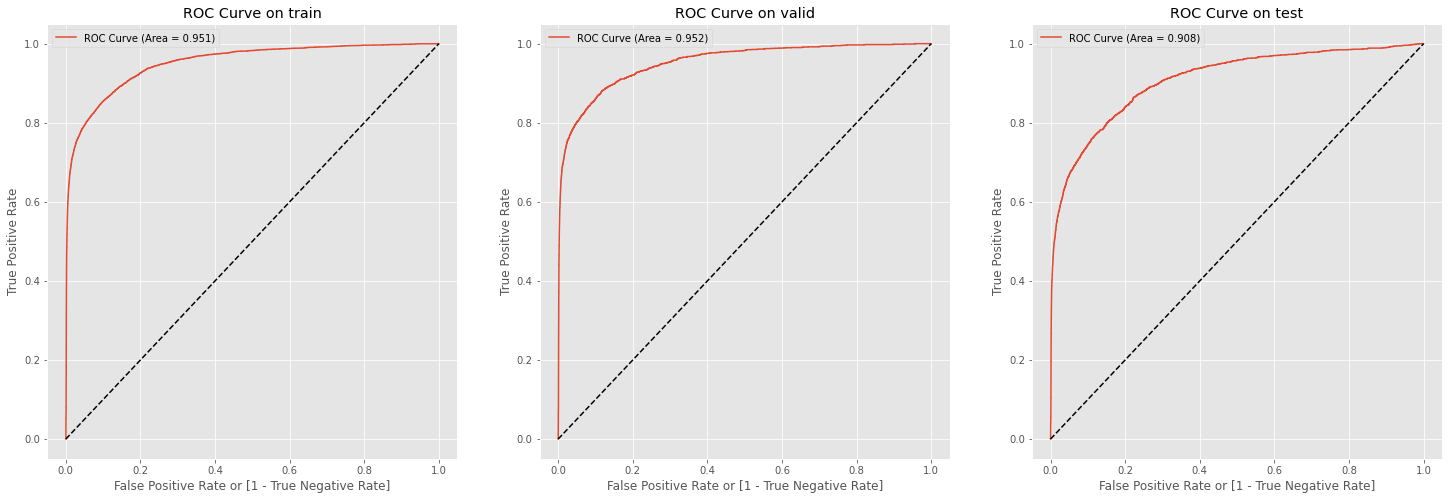

In [16]:
pred_probs_svc = [svc._predict_proba_lr(X[:,cols_svc])[:,1] for X in (X_train_decomposed, X_valid_decomposed, X_test_decomposed)]

plot_roc_curve(pred_probs_svc)

## Conclusion

Based on the above results, logistic regression is the best model to proceed with.

Kindly note that due to severe computational constraints, there was no scope to try out other models such as Random Forest, XGBoost, K Nearest Neighbours, etc. since those models require lot of cross validation using Grid Search CV. But one point to be noted out is that even with simple models, a decent recall and roc auc score was achieved.